In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [17]:
xls_file = pd.ExcelFile('0 CAC _ Case Study Data .xlsx')

# Check the available sheet names
sheet_names = xls_file.sheet_names
print(sheet_names)

['Guide Data 1', 'Control', 'Test ']


In [18]:
test_data = xls_file.parse('Test ')
control_data = xls_file.parse('Control')

In [19]:
test_data.isnull().sum()

Kid Name                      0
Age(In Years)                 0
State                         0
Is Male?                      0
Is Rural Area ?               0
Is Meat Consumer?             0
HouseHold Income per month    0
Base Height                   0
Month 1                       0
Month 2                       0
Month 3                       0
Month 4                       0
Month 5                       0
Month 6                       0
Month 7                       0
Month 8                       0
Month 9                       0
Month 10                      0
Month 11                      0
Month 12                      0
dtype: int64

In [20]:
#'Month 12' is the column to compare
t_stat, p_value = ttest_ind(test_data['Month 12'], control_data['Month 12'])

# p-value
if p_value < 0.05:
    print("The difference in height is statistically significant.")
else:
    print("There is no statistically significant difference in height.")


The difference in height is statistically significant.


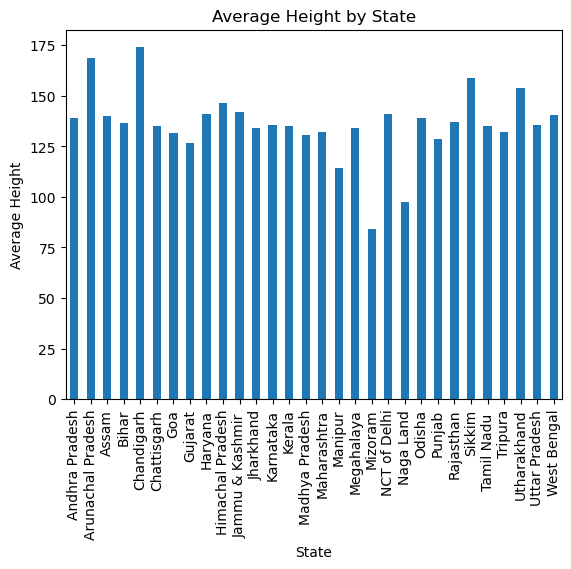

In [21]:
# Geographical Analysis
statewise_analysis = test_data.groupby('State')['Month 12'].mean()

# Visualize statewise differences
statewise_analysis.plot(kind='bar', title='Average Height by State')
plt.xlabel('State')
plt.ylabel('Average Height')
plt.show()

In [22]:
'''most states are showing an average height increase above 125, 
it indicates a widespread positive impact of BlueBull. 
This provides support for the CEO to consider marketing the product as a height enhancer across India.

Chandighar has more average height around 175

SyntaxError: incomplete input (37180832.py, line 1)

In [26]:
threshold = 125

#significant increase in height
potential_marketing_states = statewise_analysis[statewise_analysis > threshold]

# Printing the list of potential marketing states
print("States with a significant increase in height (potential for marketing):")
print(potential_marketing_states.index.tolist())

States with a significant increase in height (potential for marketing):
['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir ', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Megahalaya', 'NCT of Delhi', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu ', 'Tripura', 'Utharakhand', 'Uttar Pradesh', 'West Bengal']


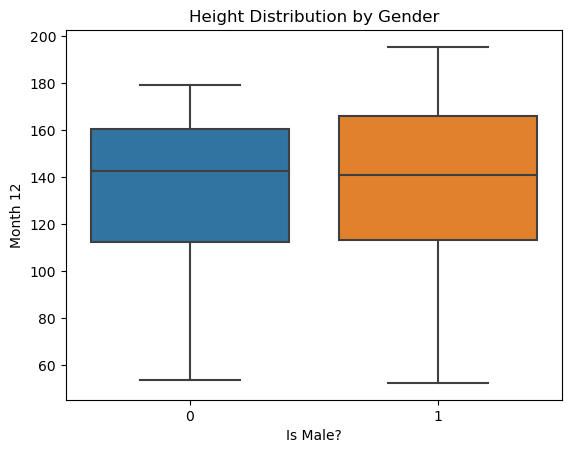

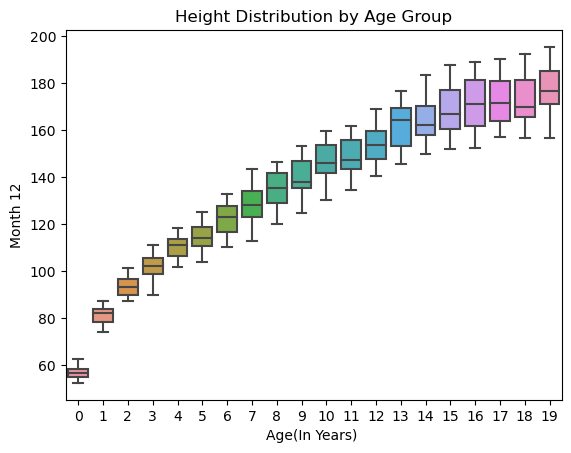

In [28]:
# Demographic Analysis for Gender
sns.boxplot(x='Is Male?', y='Month 12', data=test_data)
plt.title('Height Distribution by Gender')
plt.show()

# Demographic Analysis for Age Groups
sns.boxplot(x='Age(In Years) ', y='Month 12', data=test_data)
plt.title('Height Distribution by Age Group')
plt.show()


In [ ]:
#For Females (Is Male = 0):

#The 25th percentile (Q1) is 115, meaning 25% of females have a height less than 115.
#The 75th percentile (Q3) is 160, meaning 75% of females have a height less than 160.

In [ ]:
#For Males (Is Male = 1):

#The 25th percentile (Q1) is 117, meaning 25% of males have a height less than 117.
#The 75th percentile (Q3) is 165, meaning 75% of males have a height less than 165.

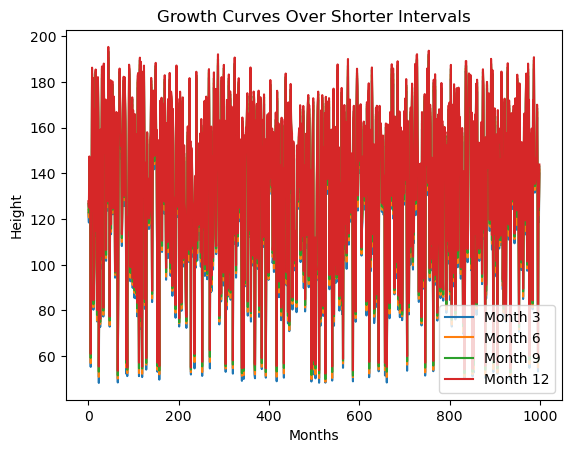

In [29]:

plt.plot(test_data['Month 3'], label='Month 3')
plt.plot(test_data['Month 6'], label='Month 6')
plt.plot(test_data['Month 9'], label='Month 9')
plt.plot(test_data['Month 12'], label='Month 12')
plt.legend()
plt.title('Growth Curves Over Shorter Intervals')
plt.xlabel('Months')
plt.ylabel('Height')
plt.show()

In [30]:
#conducting statistical tests like early analysis
#Exploreing existing literature or studies on similar products or 
#ingredients to gauge whether the expected effects are typically observed within a shorter timeframe.
#talking with industry experts

In [31]:
#for early analysis

t_stat_3_vs_6, p_value_3_vs_6 = ttest_ind(test_data['Month 3'], test_data['Month 6'])
t_stat_6_vs_9, p_value_6_vs_9 = ttest_ind(test_data['Month 6'], test_data['Month 9'])
t_stat_9_vs_12, p_value_9_vs_12 = ttest_ind(test_data['Month 9'], test_data['Month 12'])

# Check p-values for each interval
print("P-value for Month 3 vs. Month 6:", p_value_3_vs_6)
print("P-value for Month 6 vs. Month 9:", p_value_6_vs_9)
print("P-value for Month 9 vs. Month 12:", p_value_9_vs_12)

P-value for Month 3 vs. Month 6: 0.2487858295158171
P-value for Month 6 vs. Month 9: 0.23426394559150598
P-value for Month 9 vs. Month 12: 0.24988056598746314


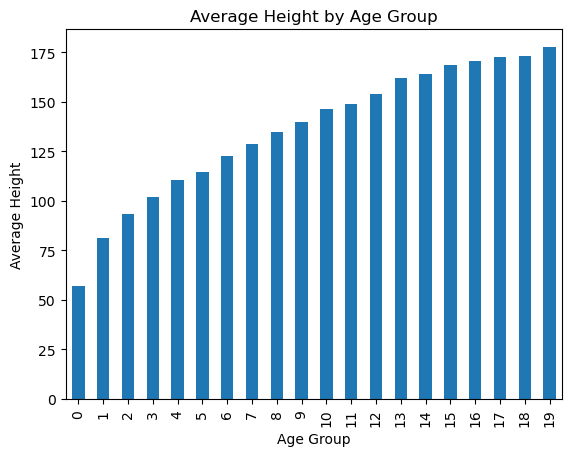

In [34]:
# Assuming 'Age in Years' is the column for subgroup analysis
subgroup_analysis = test_data.groupby('Age(In Years) ')['Month 12'].mean()

# Visualize subgroup differences
subgroup_analysis.plot(kind='bar', title='Average Height by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Height')
plt.show()

C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


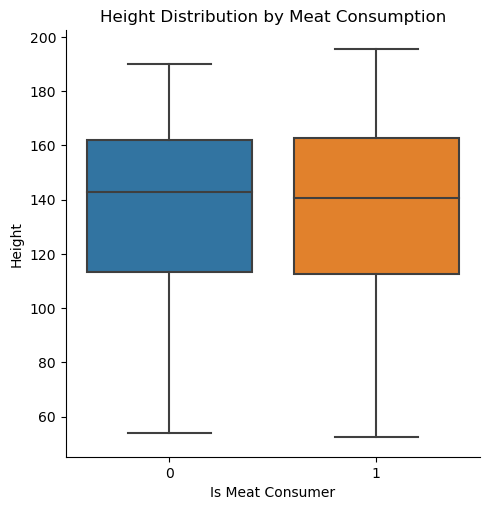

ValueError: Could not interpret input 'Is_Rural_Area'

In [50]:
# Replace spaces and question marks with underscores in column names
test_data.columns = test_data.columns.str.replace(' ', '_').str.replace('?', '')

# Categorical Analysis: Example for 'Is_Meat_Consumer' and 'Is_Rural_Area'
sns.catplot(x='Is_Meat_Consumer', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by Meat Consumption')
plt.xlabel('Is Meat Consumer')
plt.ylabel('Height')
plt.show()

sns.catplot(x='Is_Rural_Area', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by Rural Residence')
plt.xlabel('Is Rural Area')
plt.ylabel('Height')
plt.show()


In [51]:
print(test_data.columns)

Index(['Kid_Name_', 'Age(In_Years)_', 'State', 'Is_Male', 'Is_Rural_Area_',
       'Is_Meat_Consumer', 'HouseHold_Income_per_month', 'Base_Height',
       'Month_1', 'Month_2', 'Month_3', 'Month_4_', 'Month_5', 'Month_6',
       'Month_7_', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')


C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


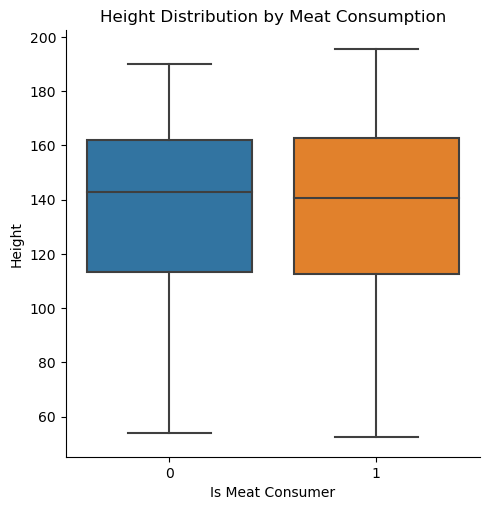

C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


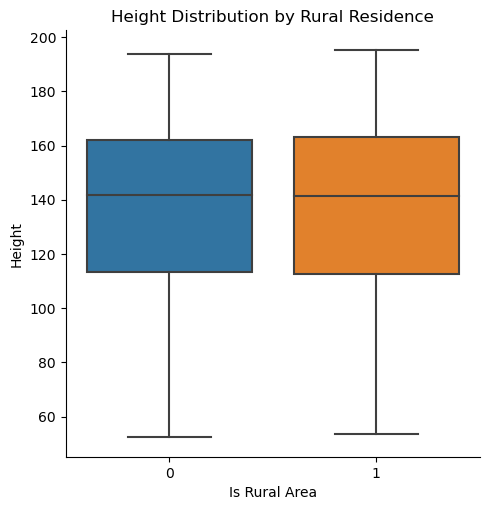

In [52]:
# Categorical Analysis: Example for 'Is_Meat_Consumer' and 'Is_Rural_Area_'
sns.catplot(x='Is_Meat_Consumer', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by Meat Consumption')
plt.xlabel('Is Meat Consumer')
plt.ylabel('Height')
plt.show()

sns.catplot(x='Is_Rural_Area_', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by Rural Residence')
plt.xlabel('Is Rural Area')
plt.ylabel('Height')
plt.show()


In [ ]:
# there is no such difference comparing is rural and is meat eater so lets see other catagories and compare

C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


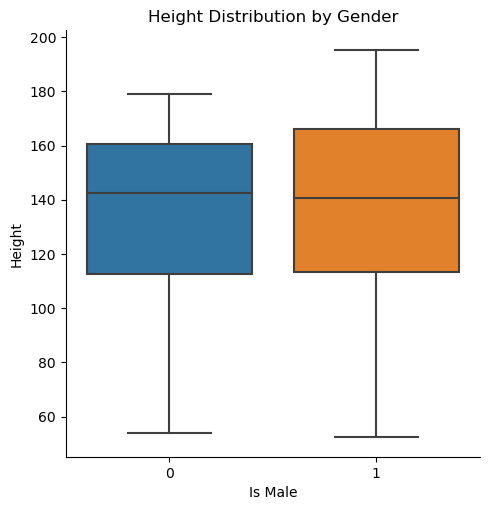

C:\Users\subramanya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


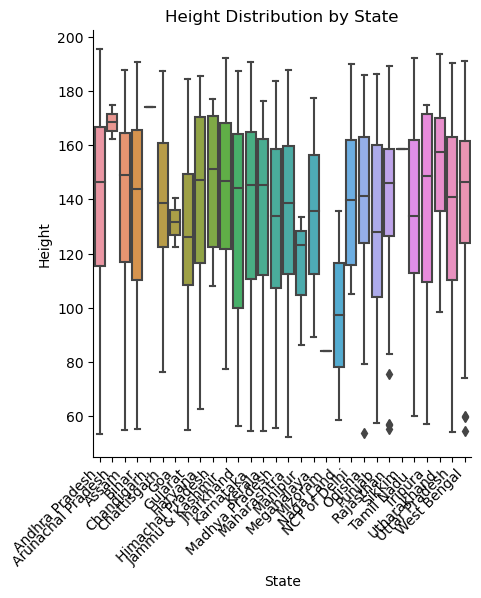

In [53]:
# Categorical Analysis: Compare 'Is_Male' and 'State'
sns.catplot(x='Is_Male', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by Gender')
plt.xlabel('Is Male')
plt.ylabel('Height')
plt.show()

sns.catplot(x='State', y='Month_12', kind='box', data=test_data)
plt.title('Height Distribution by State')
plt.xlabel('State')
plt.ylabel('Height')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
#for 'Is_Meat_Consumer' and 'Is_Rural_Area_' are exactly the same
# based on the provided data, there may not be a significant difference in height for these categorical variables.
#The percentiles and variability in height distribution are identical between the categories.

#median line in female is quit higher so gender can be considered
#This observation could be interesting in understanding regional variations in the impact of BlueBull on height also
